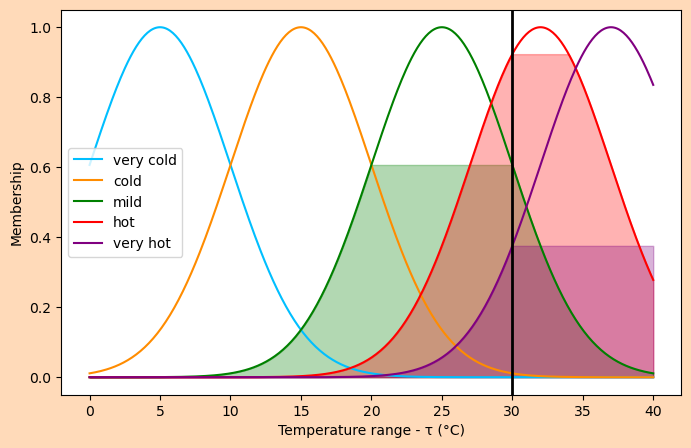

In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt

# Define temperature range
temp = np.linspace(0, 40, 400)

# Define fuzzy membership functions using Gaussian functions for smooth curves
very_cold = mf.gaussmf(temp, 5, 5)  # (mean, standard deviation)
cold = mf.gaussmf(temp, 15, 5)
mild = mf.gaussmf(temp, 25, 5)
hot = mf.gaussmf(temp, 32, 5)
#very_hot = mf.trapmf(x, [10, 14, 16, 20])
very_hot = mf.gaussmf(temp, 37, 5)


# Plot membership functions
plt.figure(figsize=(8, 5), facecolor='peachpuff')
plt.plot(temp, very_cold, 'deepskyblue', label='very cold')
plt.plot(temp, cold, 'darkorange', label='cold')
plt.plot(temp, mild, 'green', label='mild')
plt.plot(temp, hot, 'red', label='hot')
plt.plot(temp, very_hot, 'purple', label='very hot')

# Highlight a specific temperature
selected_temp = 30
plt.axvline(x=selected_temp, color='black', linewidth=2)

# Fill fuzzy membership areas for the selected temperature
vc = fuzz.interp_membership(temp, very_cold, selected_temp)
c = fuzz.interp_membership(temp, cold, selected_temp)
m = fuzz.interp_membership(temp, mild, selected_temp)
h = fuzz.interp_membership(temp, hot, selected_temp)
vh = fuzz.interp_membership(temp, very_hot, selected_temp)

plt.fill_between(temp, np.minimum(mild, m), color='green', alpha=0.3)
plt.fill_between(temp, np.minimum(hot, h), color='red', alpha=0.3)
plt.fill_between(temp, np.minimum(very_hot, vh), color='purple', alpha=0.3)

# Labels and legend
plt.xlabel('Temperature range - τ (°C)')
plt.ylabel('Membership')
plt.legend()
plt.grid(False)
plt.show()